# Attribute Information:
Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable

# Importo librerías

In [69]:
# Libraries to manage numbers and data
import numpy as np
import pandas as pd

# Libraries to do plots
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from regressors import stats

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Descargo los datos

In [46]:
df = pd.read_csv('../data/concrete_data.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# Analizo los datos

### Veo una primera información de los datos con los que trabajaré

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


La información que veo de primeras es:
- No hay datos nulos
- Todas las variables son numéricas
- Tengo un Dataframe de 9 columnas (features) por 1030 filas (examples)

### Veo una descripción de los datos con los principales estadísticos

In [48]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Nuestra variable objetivo es la resistencia a compresión. A priori se ve un gran rango de valores entre 2.33 y 82.6 Mpa. Esto lo podemos apreciar mejor con un histograma o un gráfico de cajas

### Analizo variable objetivo

##### Histograma

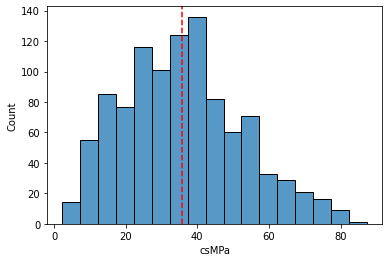

In [49]:
var_obj = 'csMPa'
hist = sns.histplot(
    data=df,
    x=var_obj,
    binwidth=5
)

mean = plt.axvline(
    x= df.csMPa.mean(),
    color='r',
    linestyle='dashed',
)

mean.set_label('Mean')


##### Boxplot

<AxesSubplot: xlabel='csMPa'>

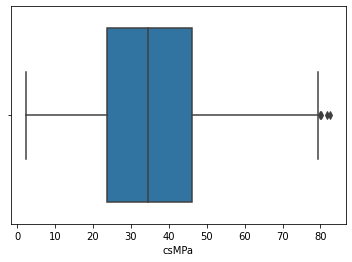

In [50]:
sns.boxplot(
    data=df,
    x=var_obj

)

- Los valores se concentran entre los 25 y los 45 Mpa
- Se aprecia un comportamiento normal con cierto sesgo hacia la izquierda

#### KDE

<AxesSubplot: xlabel='csMPa', ylabel='Density'>

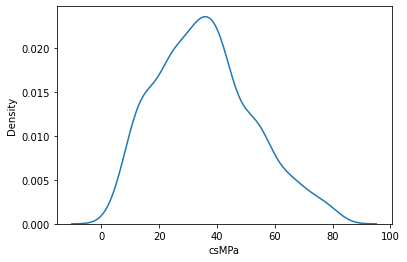

In [51]:
sns.kdeplot(
    data = df,
    x = var_obj
)

#### ECDF

<AxesSubplot: xlabel='csMPa', ylabel='Proportion'>

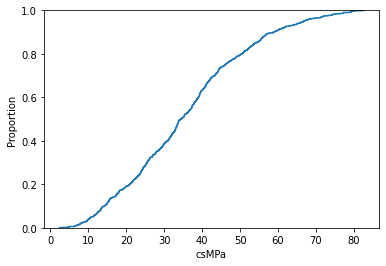

In [52]:
sns.ecdfplot(
    data = df,
    x = var_obj
)

# Analizando Relaciones

Antes de analizar, corto la variable objetivo en 4 y agrego la variable agua/cemento

In [107]:
bins = pd.qcut(
    x = df[var_obj],
    q = 4
)

# Agrego los bins al df
df['bins'] = bins

In [54]:
df['water/cement'] = df['water'] / df['cement']

Vemos la relación entre todas las variables

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


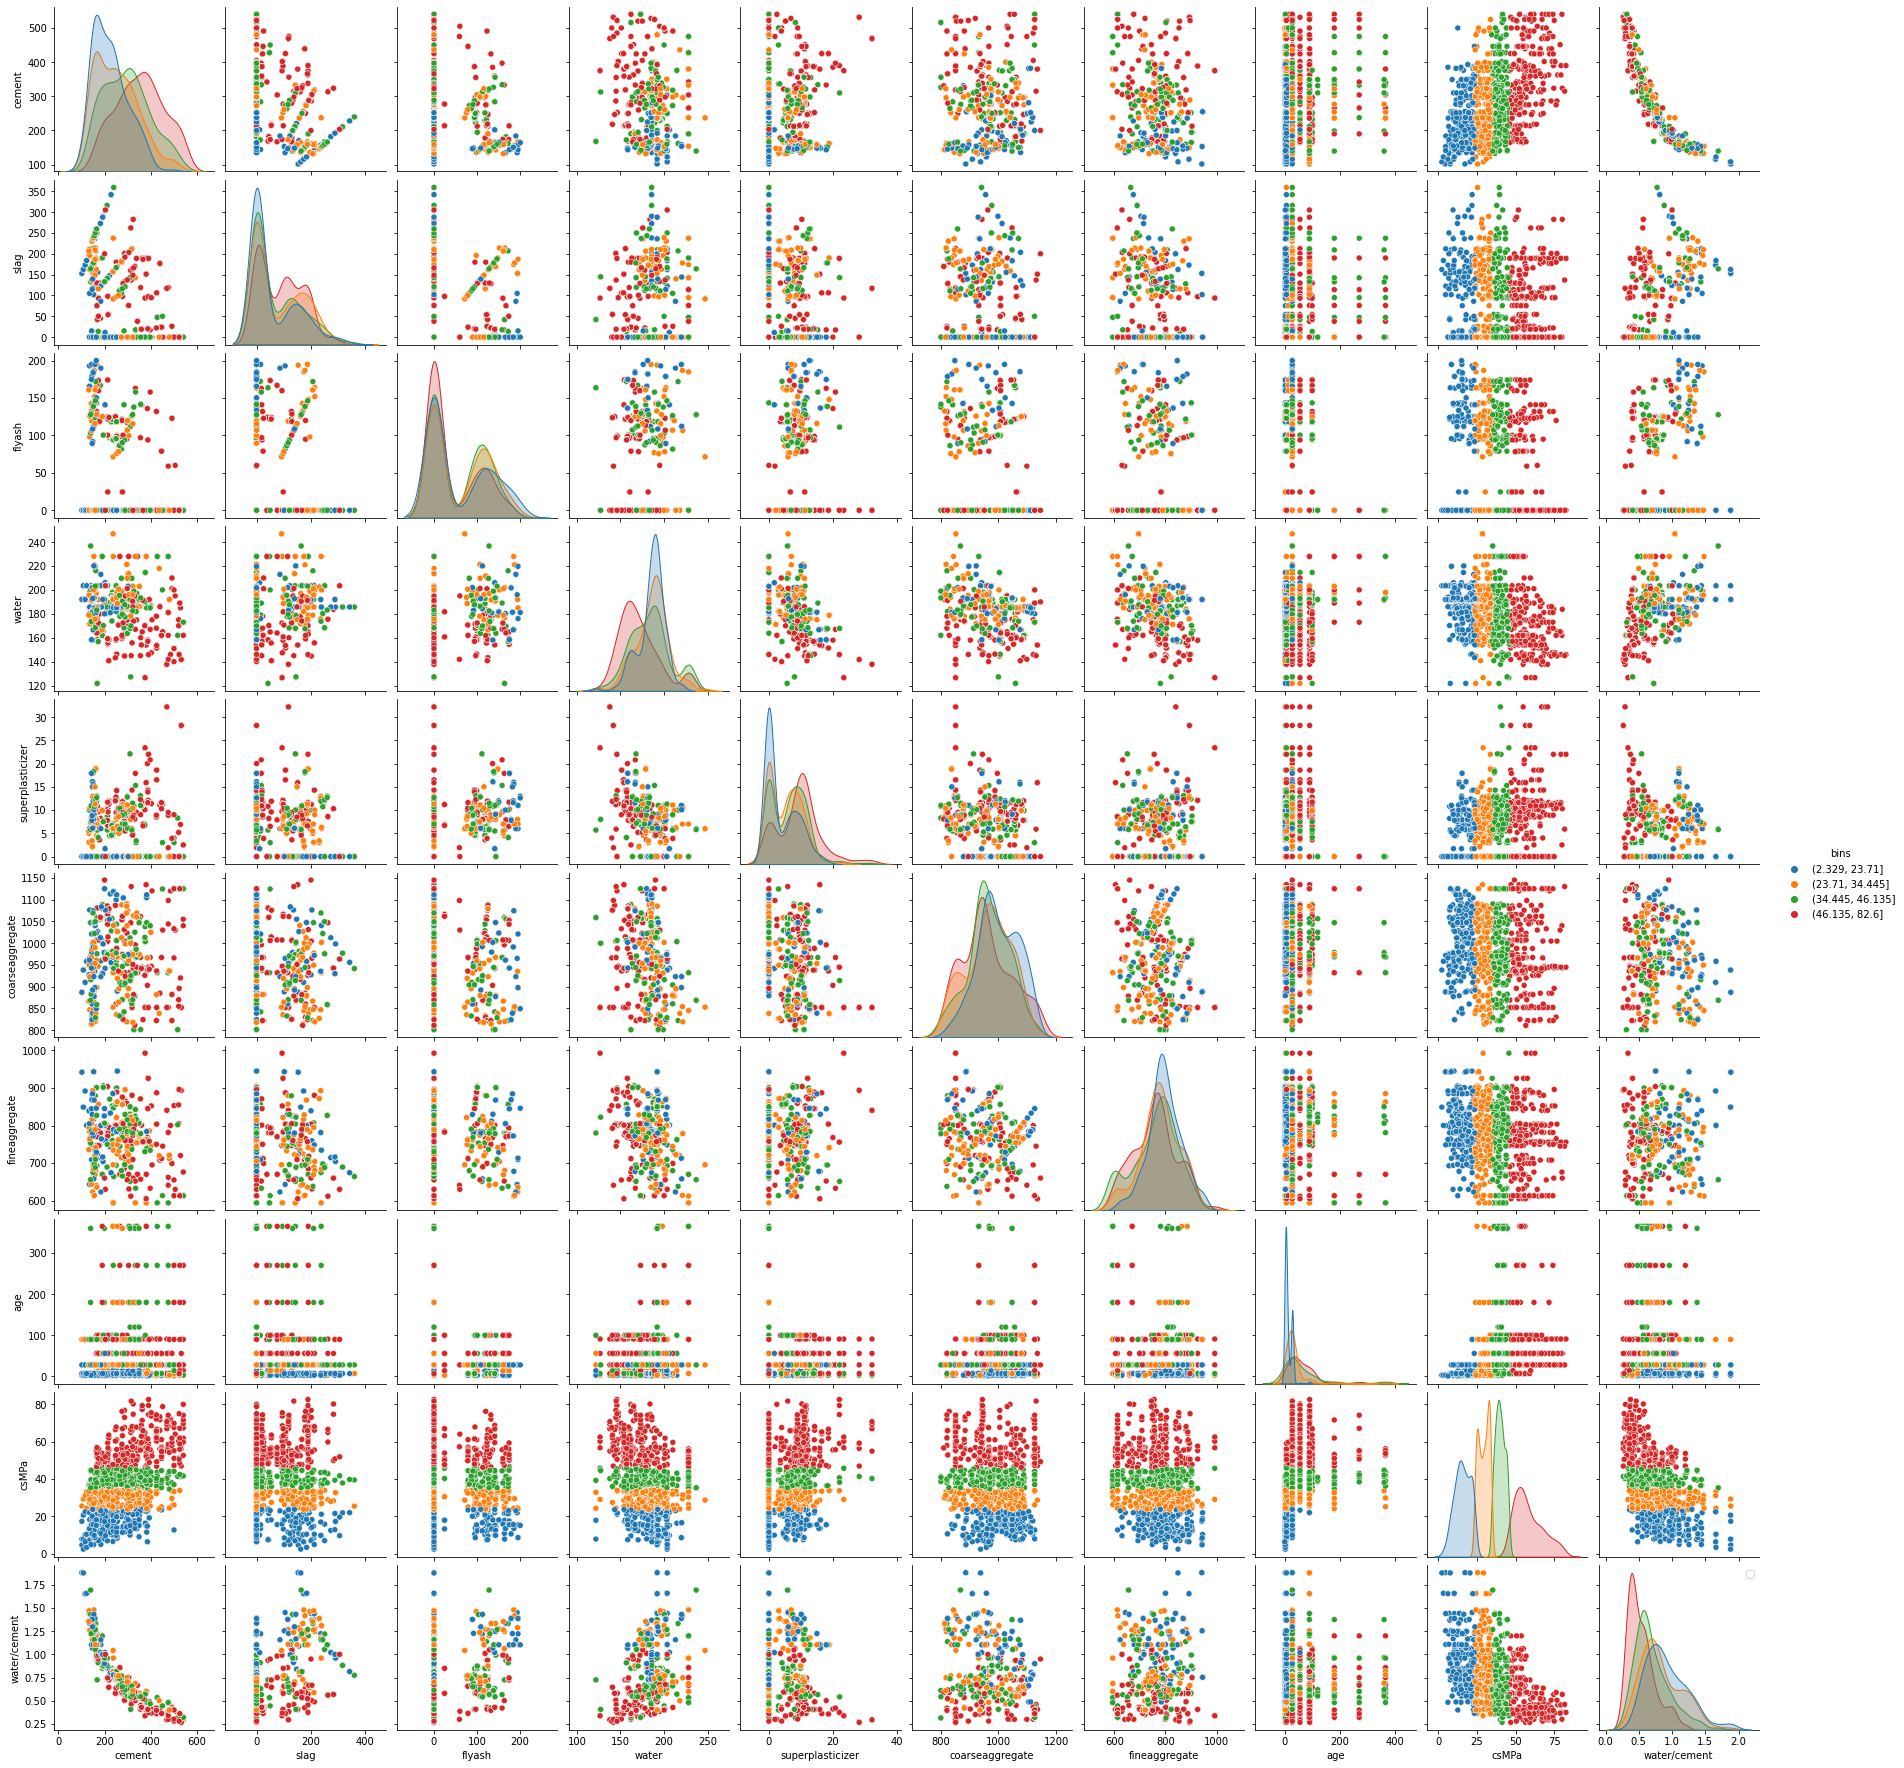

In [55]:
sns.pairplot(data=df, hue='bins')
plt.legend()
plt.show()

Puntos a notar:
- Los mayores valores de resistencia se concentran en los valores más bajos de agua cemento
- Los kg/m3 de cemento parecen tener una relación lineal con la resistencia, aunque con mucha dispersión
- Los mayores valores de resistencia se concentran en los menores valores de contenido de agua
- Lo anterior también sucede (aunque en menor magnitud) con las cenizas volantes

<AxesSubplot: xlabel='water/cement', ylabel='csMPa'>

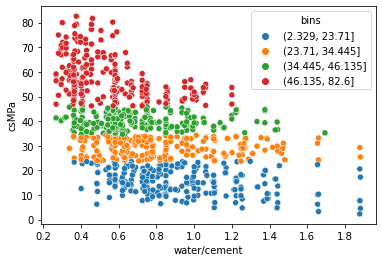

In [109]:
sns.scatterplot(
    data=df,
    x='water/cement',
    y='csMPa',
    hue='bins'
)

### Correlaciones lineales

Elimino los bins

In [56]:
df = df.drop('bins', axis=1)

<AxesSubplot: >

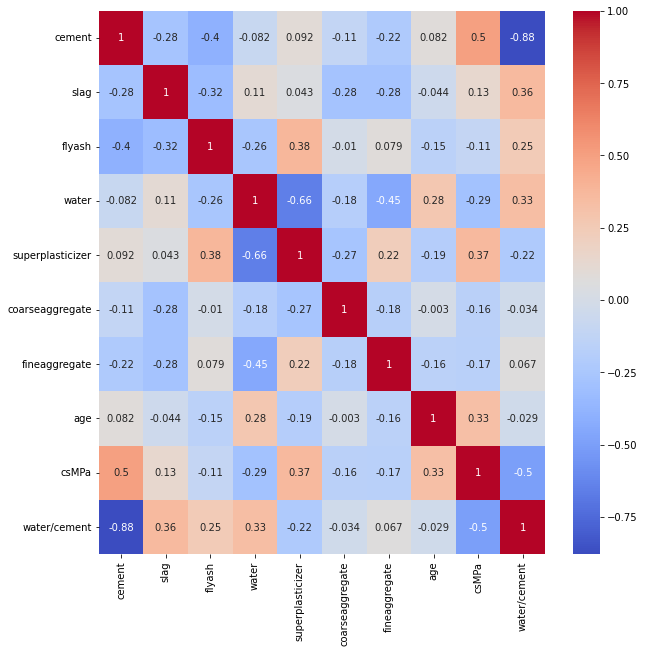

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data = df.corr(),
    annot=True,
    cbar=True,
    cmap='coolwarm'
)

Las principales correlaciones con la resistencia son:
- Agua
- Cemento
- Superplastificante
- Edad

# Preparando el modelo

Separo entre la columna objetivo y las que se relacionan con esta

In [82]:
X_cols = ['slag','flyash','superplasticizer','coarseaggregate','fineaggregate','age','water/cement']
y_col = [var_obj]

Tomo los valores de dichas columnas

In [83]:
X = df[X_cols].values
y = df[y_col].values

Separo el conjunto de datos en uno de entrenamiento (80% de los datos) y otro de prueba (20% de los datos) para poder validar el modelo.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Estandarizo los datos. 'fit' tomará la media y varianza y 'transform' estadizará

In [86]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# Regresión Lineal

Creo el modelo

In [111]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(
    f"""
    R2: {r2_score(y_test,y_pred)}
    MSE: {mean_squared_error(y_test,y_pred)}
    """
)


    R2: 0.4908989298869614
    MSE: 0.4633106771824695
    


Veo un resumen de los resultados

In [88]:
from regressors import stats
model.coef_ = model.coef_.reshape(-1)

In [89]:
y_test_reshaped = y_test.reshape(-1)

stats.summary(
    clf=model,
    X=X_test,
    y=y_test_reshaped,
    xlabels = X_cols

)

Residuals:
    Min      1Q  Median     3Q    Max
-2.2829 -0.3775  0.0316 0.4349 1.8503


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.047671   0.0000  1.000000
slag              0.403071    0.071130   5.6667  0.000000
flyash            0.146072    0.065978   2.2139  0.027934
superplasticizer  0.239395    0.063347   3.7791  0.000206
coarseaggregate  -0.004927    0.053397  -0.0923  0.926576
fineaggregate    -0.035164    0.062325  -0.5642  0.573230
age               0.404487    0.057227   7.0682  0.000000
water/cement     -0.614188    0.062970  -9.7537  0.000000
---
R-squared:  0.49090,    Adjusted R-squared:  0.47290
F-statistic: 27.27 on 7 features


Las variables con pvalue mayor a 0.05 no están colaborando en la regresión


    R2: 0.4908989298869614
    MSE: 0.4633106771824695
    


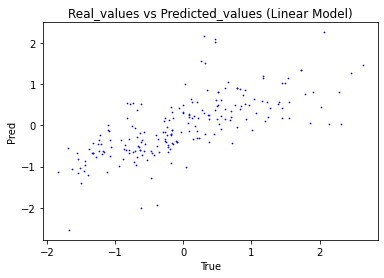

In [115]:
plt.scatter(y_test, y_pred, c='b', s=0.5)
plt.xlabel('True')
plt.ylabel('Pred')
plt.title('Real_values vs Predicted_values (Linear Model)')
print(
    f"""
    R2: {r2_score(y_test,y_pred)}
    MSE: {mean_squared_error(y_test,y_pred)}
    """
)

# Random Forest Regression

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(
    f"""
    R2: {r2_score(y_test,y_pred)}
    MSE: {mean_squared_error(y_test,y_pred)}
    """
)


    R2: 0.915673430715196
    MSE: 0.07674193242442441
    


Comparativa entre valores reales y valores que se predijeron

Linear Model
    R2: 0.915673430715196
    MSE: 0.07674193242442441
    


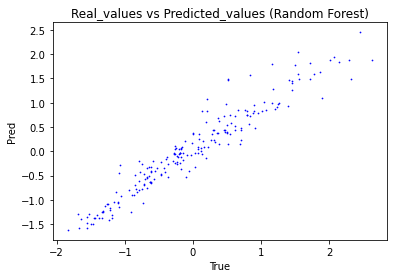

In [117]:
plt.scatter(y_test, y_pred, c='b', s=0.5)
plt.xlabel('True')
plt.ylabel('Pred')
plt.title('Real_values vs Predicted_values (Random Forest)')
print(
    f"""Linear Model
    R2: {r2_score(y_test,y_pred)}
    MSE: {mean_squared_error(y_test,y_pred)}
    """
)

Veo las variables con mayor peso en el modelo

AxesSubplot(0.125,0.125;0.775x0.755)


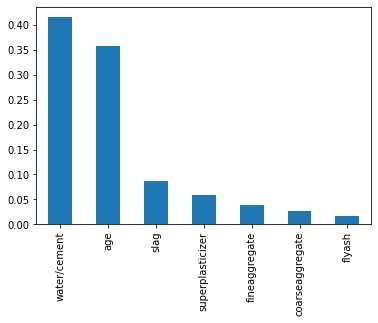

In [100]:
wweigths = pd.Series(
    model.feature_importances_,
    index = X_cols
)
print(
    wweigths.sort_values(ascending=False)[-10:].plot(kind='bar')
)

Residuales

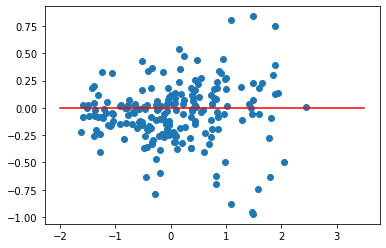

In [101]:
residuals = np.subtract(y_test.reshape(-1,), y_pred)
plt.scatter(y_pred.reshape(-1,1), residuals)
x = np.linspace(-2,3.5,10)
plt.plot(x,x*0, color='r')
plt.show()

Comparación de valores reales y los que se predijeron

In [103]:
y_test_real = sc_y.inverse_transform(y_test)
y_pred_real = sc_y.inverse_transform(y_pred.reshape(-1,1))

In [104]:
pd.DataFrame({'True': y_test_real.reshape(-1,), 'Pred': y_pred_real.reshape(-1,)})

,True,Pred
0,28.99,28.570500
1,21.18,20.717500
2,32.10,33.948200
3,26.40,29.174700
4,17.20,18.199400
...,...,...
201,51.06,49.733600
202,25.45,30.387700
203,55.45,52.574165
204,42.29,38.269500


# Conclusión

A partir de un modelo de Random Forest Regressor se logra una predicción de la tensión de rotura con un R2 de 0.915 y un error de mínimos cuadrados de 0.076, siendo muy superior a una regresión lineal en la cual no se supera el R2 de 0.5

Las principales variables que utilizan los múltiples árboles de decisión son la relación agua/cemento y la edad seguidos, en menor proporción, por el contenido de escoria y superplastificante